In [51]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [52]:
# loading the data
train = pd.read_csv(r"C:\Users\ankit\OneDrive\Desktop\train.csv")
test = pd.read_csv(r"C:\Users\ankit\OneDrive\Desktop\test.csv")

In [53]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [54]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [55]:
train.shape, test.shape

((31647, 18), (13564, 17))

In [56]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [57]:
#printing first five rows of the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [58]:
train['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

In [59]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64

<Axes: xlabel='subscribed'>

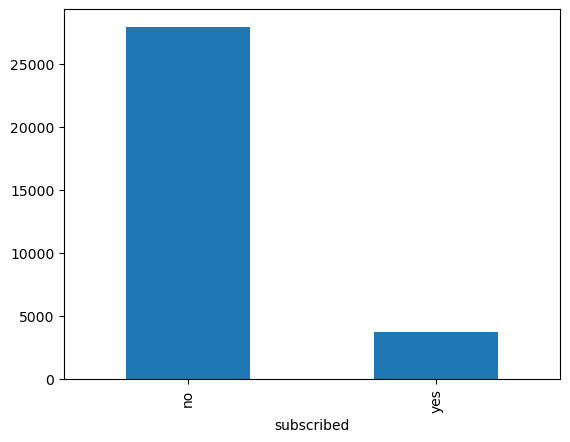

In [60]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

<Axes: xlabel='age', ylabel='Density'>

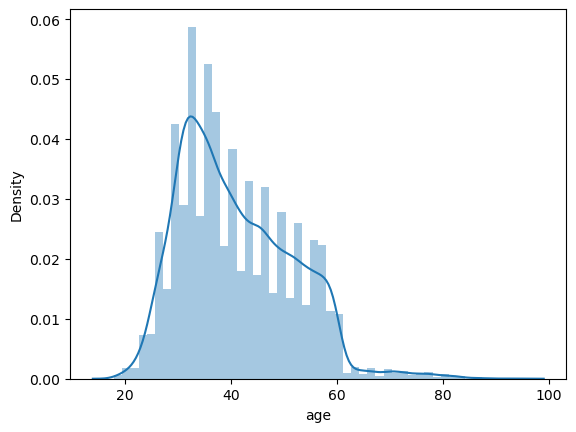

In [61]:
sn.distplot(train["age"])

<Axes: xlabel='job'>

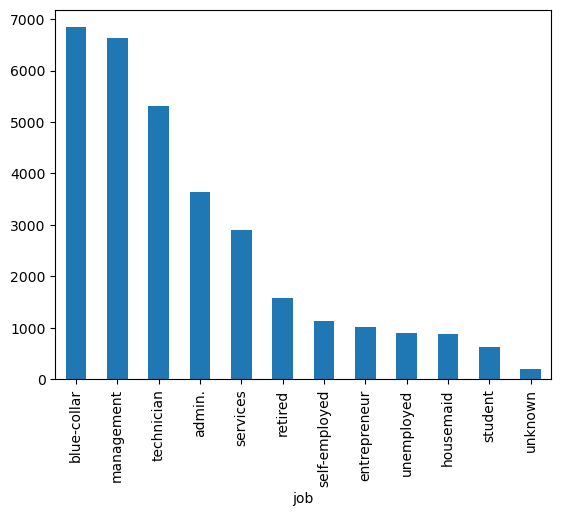

In [62]:
train['job'].value_counts().plot.bar()

<Axes: xlabel='default'>

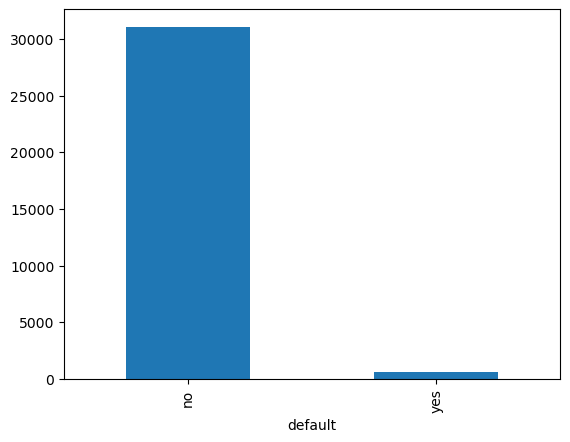

In [63]:
train['default'].value_counts().plot.bar()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

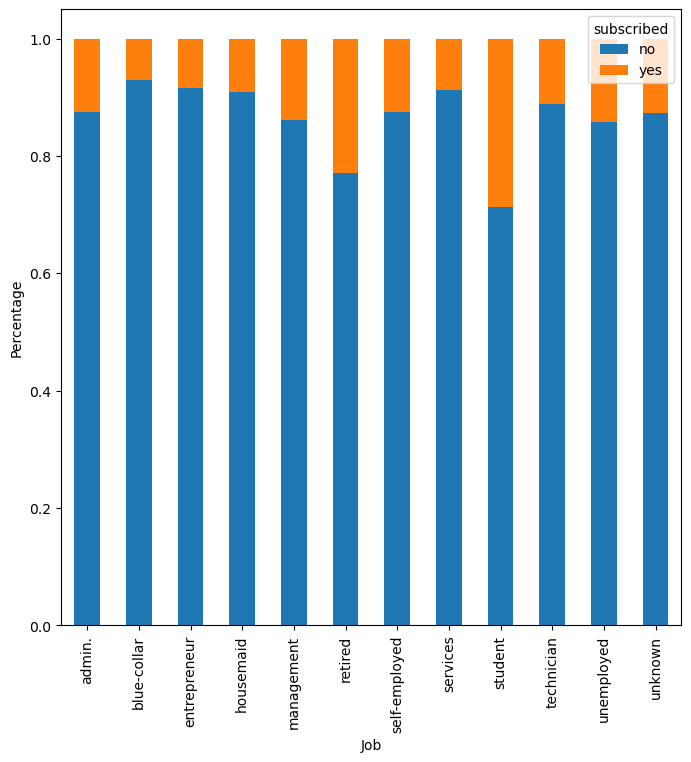

In [64]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

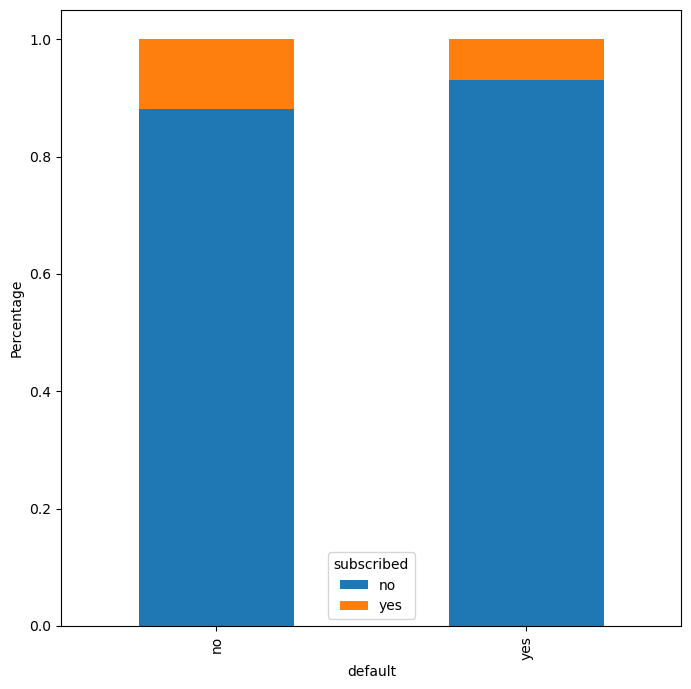

In [65]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [66]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

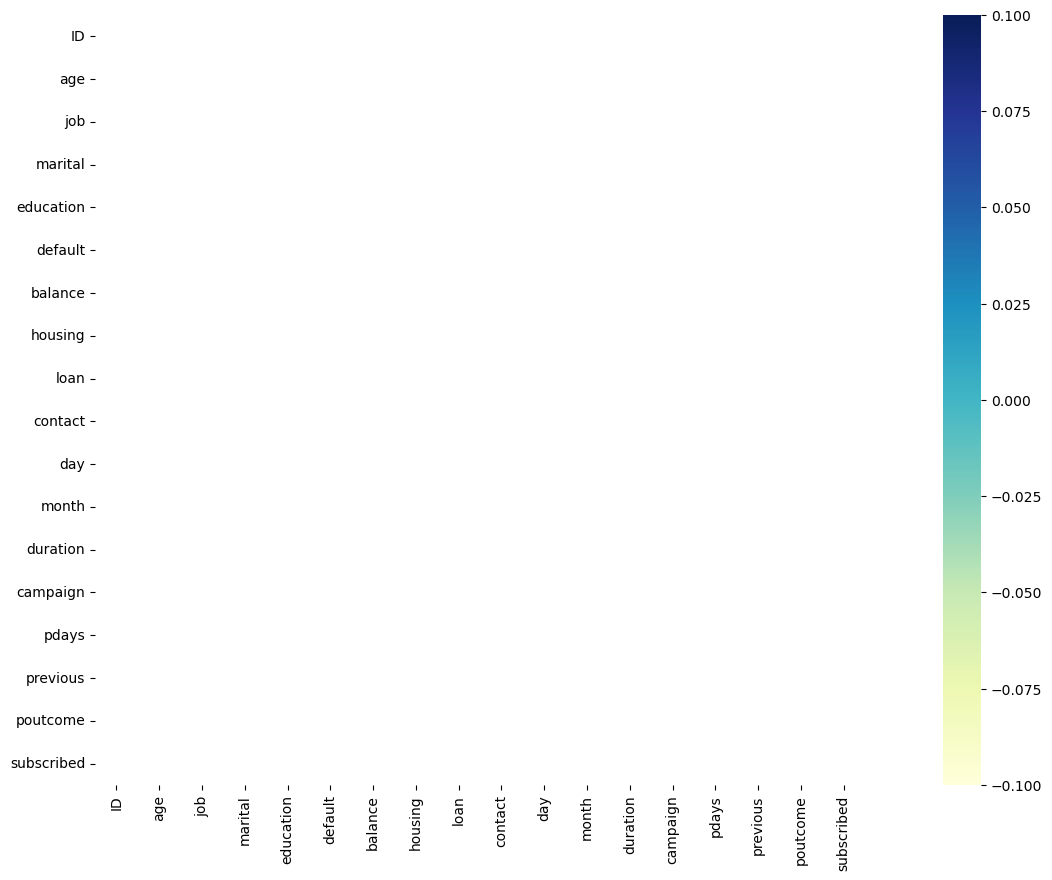

In [67]:
train_numeric = train.apply(pd.to_numeric, errors='coerce')

# Handle missing values (you can adjust this based on your data)
train_numeric = train_numeric.dropna()

# Calculate correlation
corr = train_numeric.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))

# Draw the heatmap with the mask
sn.heatmap(corr, mask=mask, vmax=.9, square=True, annot=True, cmap="YlGnBu")

# Show the plot
plt.show()

In [68]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [69]:
target = train['subscribed']
train.drop('subscribed',axis=1,inplace=True)

In [70]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
# defining the logistic regression model
lreg = LogisticRegression()

In [75]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression()

In [76]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

In [77]:
from sklearn.metrics import accuracy_score

In [38]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.889257503949447

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [41]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [42]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [43]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.9042654028436019

In [44]:
test = pd.get_dummies(test)

In [45]:
test_prediction = clf.predict(test)

In [46]:
submission = pd.DataFrame()

In [47]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [48]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [49]:
submission.to_csv('submission.csv', header=True, index=False)